In [3]:
import json
import csv

In [4]:
cpsat_sol = []
with open('cpsat_solutions.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        cpsat_sol.append(row)

In [1]:
def compare_results(cpsat_infer):
    comparison_results = []
    for test_bench_id, test_result in cpsat_infer.items():
        row = 0
        while int(cpsat_sol[row][0]) != test_result['benchmark_id']:
            row += 1
        bench_row_start = row
        while int(cpsat_sol[row][3]) > test_result['feasibility_abs_makespan'] and \
            int(cpsat_sol[row][0]) == test_result['benchmark_id']:
            row += 1
        if row > bench_row_start and int(cpsat_sol[row][0]) == test_result['benchmark_id']:
            cpsat_same_quality_time = 0.5 * (float(cpsat_sol[row - 1][1]) + float(cpsat_sol[row][1]))
        else:
            cpsat_same_quality_time = float(cpsat_sol[row][1])
        infer_feasible_time = test_result['inference_time'] + test_result['feasibility_timing']
        comparison_results.append({
            'benchmark_id': test_result['benchmark_id'],
            'infer_feasible_time': infer_feasible_time,
            'cpsat_same_quality_time': cpsat_same_quality_time,
            'rel_time_savings_per': infer_feasible_time / cpsat_same_quality_time * 100.0
        })
    return comparison_results

### Unconstrained makespan case

In [6]:
with open('inference_vs_cpsat_um.json', 'r') as jsonfile:
    cpsat_infer = json.load(jsonfile)
    comparison_results = compare_results(cpsat_infer)

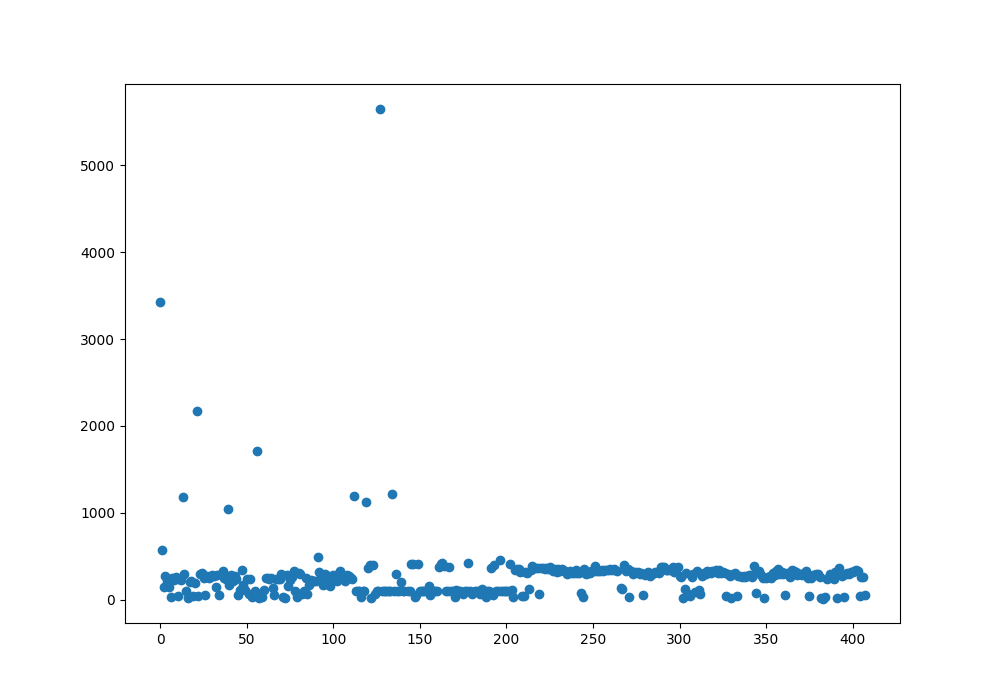

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

rel_time_savings = [res['rel_time_savings_per'] for res in comparison_results]
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(x=np.arange(len(comparison_results)), y=rel_time_savings)
plt.show()

In [8]:
len([r for r in rel_time_savings if r < 100]) / len(rel_time_savings) * 100.

25.49019607843137

In [9]:
len([r for r in rel_time_savings if r > 100]) / len(rel_time_savings) * 100.

73.2843137254902

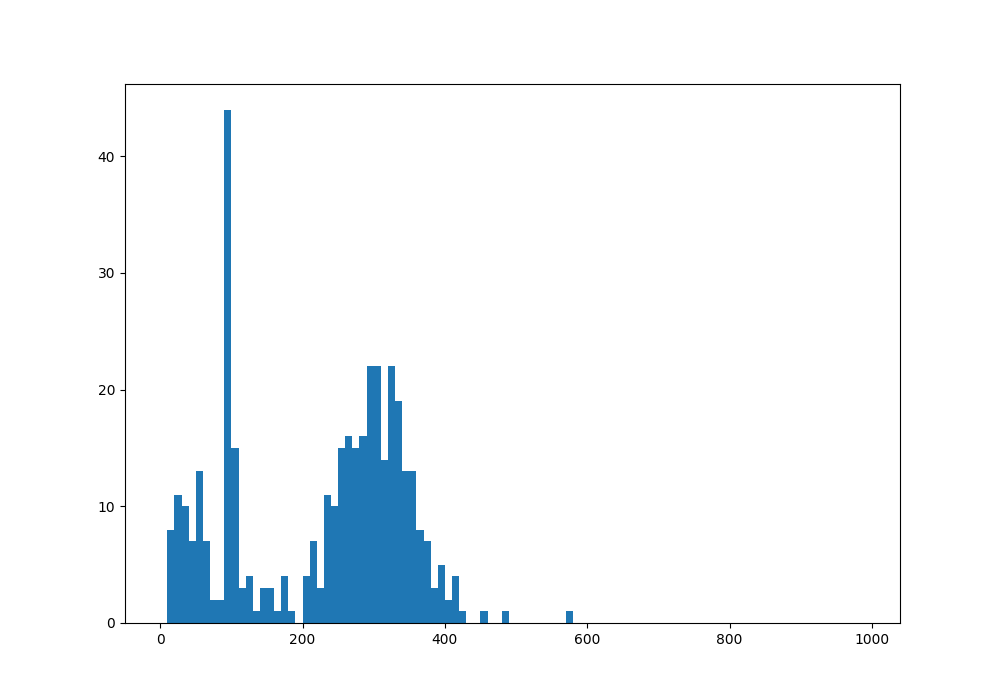

In [10]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(rel_time_savings, bins=np.arange(start=0, stop=1000, step=10))
plt.show()

### Constrained makespan case

In [11]:
with open('inference_vs_cpsat_cm.json', 'r') as jsonfile:
    cpsat_infer = json.load(jsonfile)
    comparison_results = compare_results(cpsat_infer)

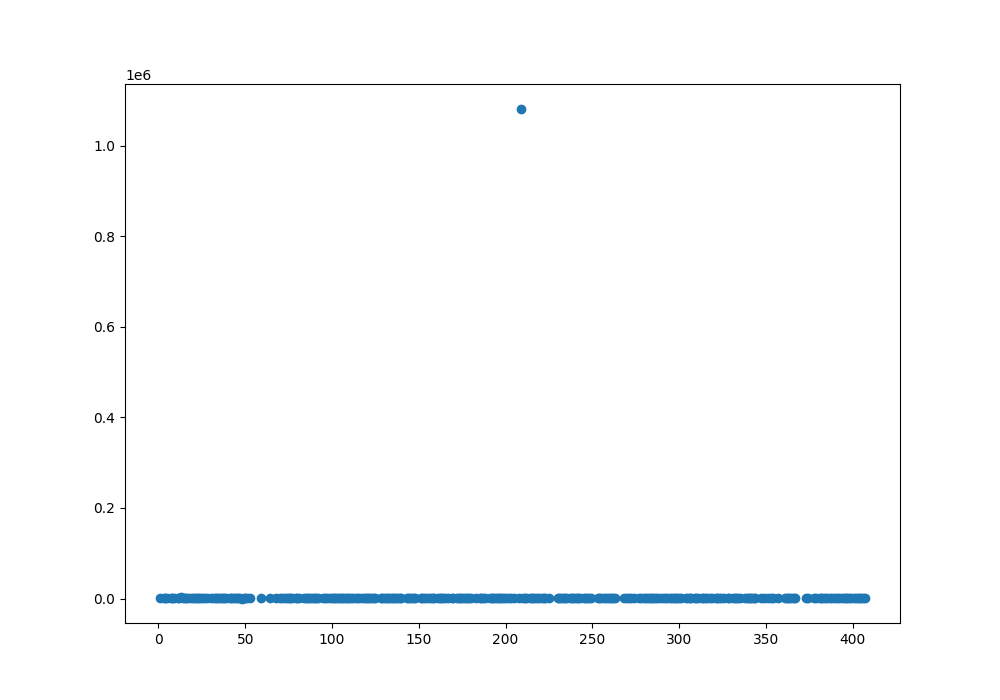

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

rel_time_savings = [res['rel_time_savings_per'] for res in comparison_results]
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(x=np.arange(len(comparison_results)), y=rel_time_savings)
plt.show()

In [13]:
len([r for r in rel_time_savings if r < 100]) / len(rel_time_savings) * 100.

40.44117647058824

In [14]:
len([r for r in rel_time_savings if r > 100]) / len(rel_time_savings) * 100.

32.35294117647059

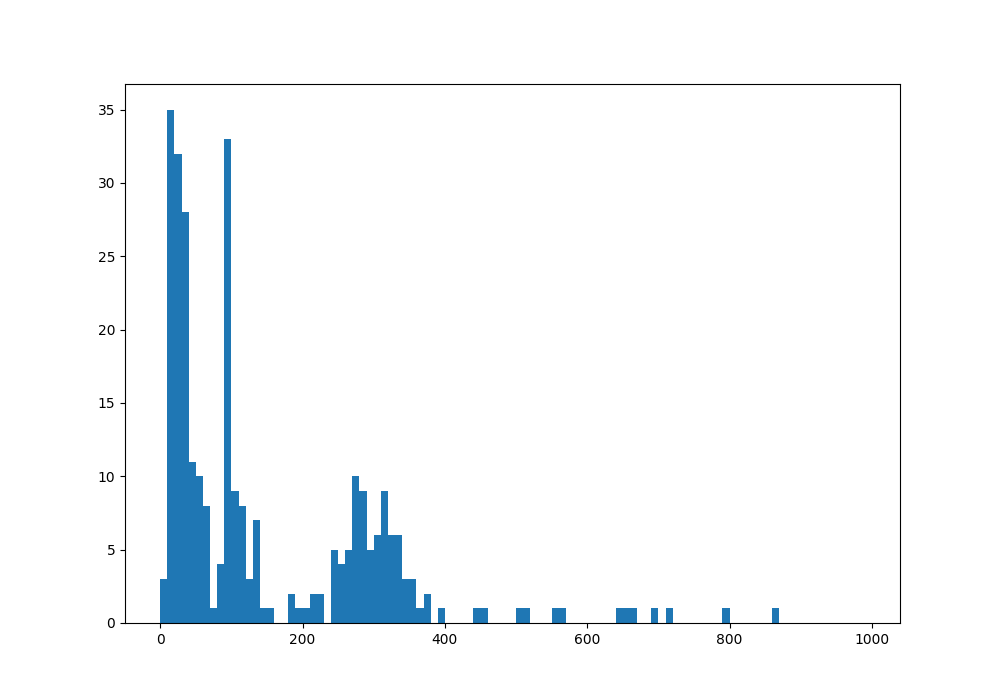

In [15]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(rel_time_savings, bins=np.arange(start=0, stop=1000, step=10))
plt.show()